## Random Forest (Classification)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,RocCurveDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
df = pd.read_csv('titanic (1).csv')

### EDA

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
# Check for duplicates
dups = df.duplicated()
print(f"Number of duplicated rows: {dups.sum()}")
df[dups]

Number of duplicated rows: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


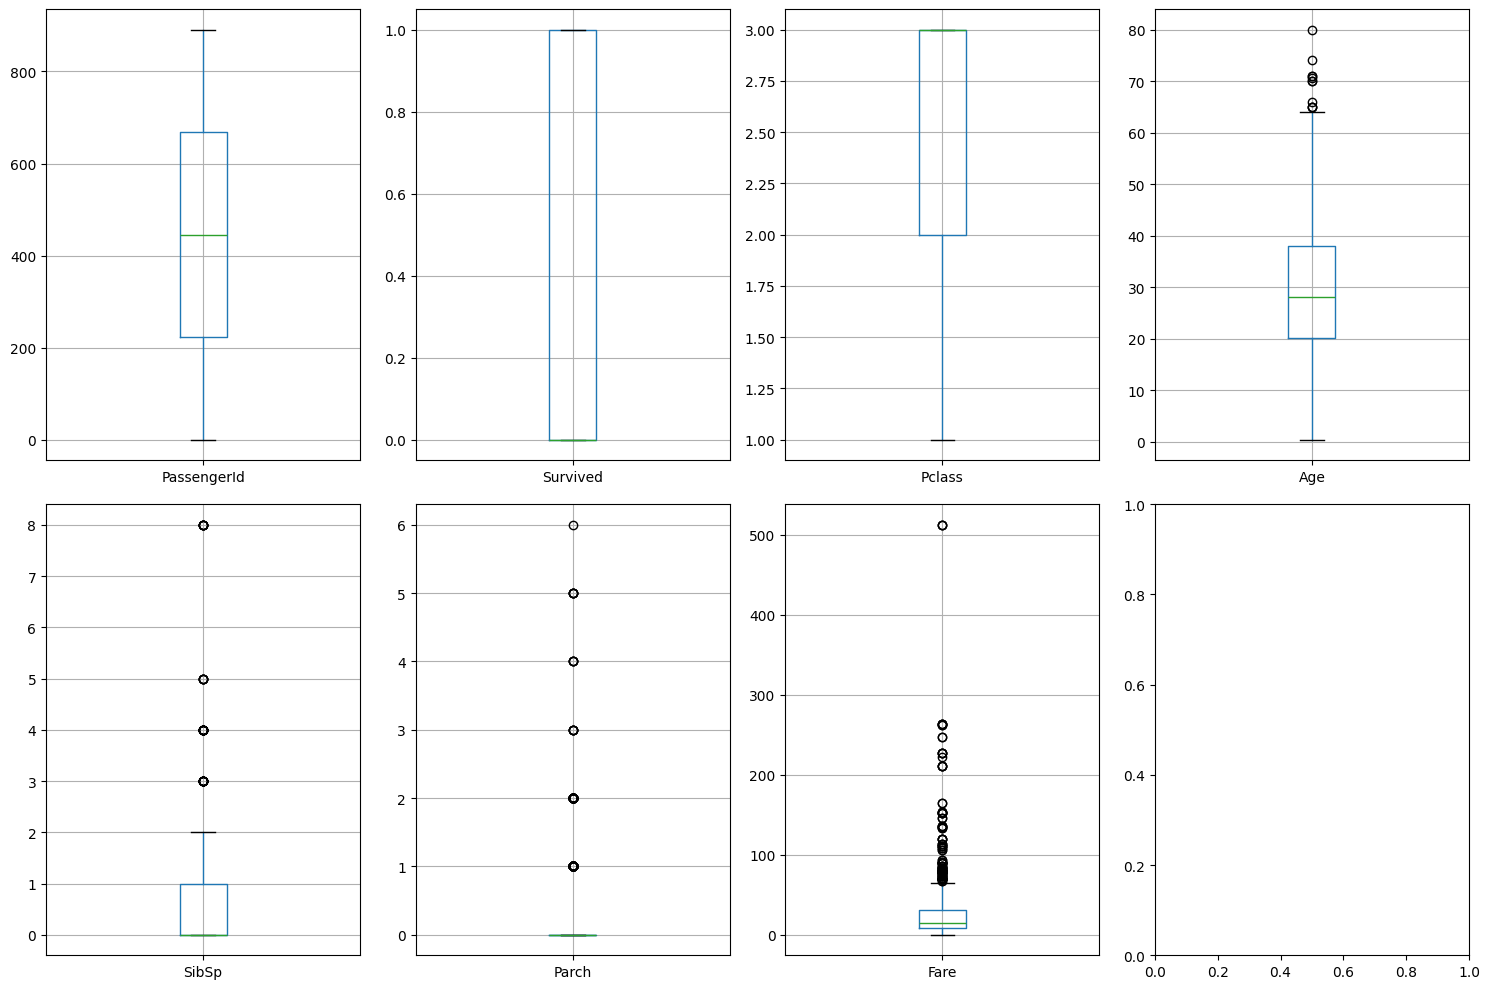

In [ ]:
# Check for outliers in numerical features using subplots
cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig, axes = plt.subplots(2, 4, figsize = (15, 10))
axes = axes.flatten()

for i, cols in enumerate(cols):
    df.boxplot(column = cols, ax = axes[i])

plt.tight_layout()
plt.show()

In [55]:
# Remove outliers using IQR method

def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_bound = Q1 - (1.5 * IQR)
    Upper_bound = Q3 + (1.5 * IQR)
    return Lower_bound, Upper_bound

cols = ['Age', 'SibSp', 'Parch', 'Fare']

for col in cols:
    lb, ub = remove_outliers(df[col])
    df[col] = np.where(df[col] < lb, lb, np.where(df[col] > ub, ub, df[col]))


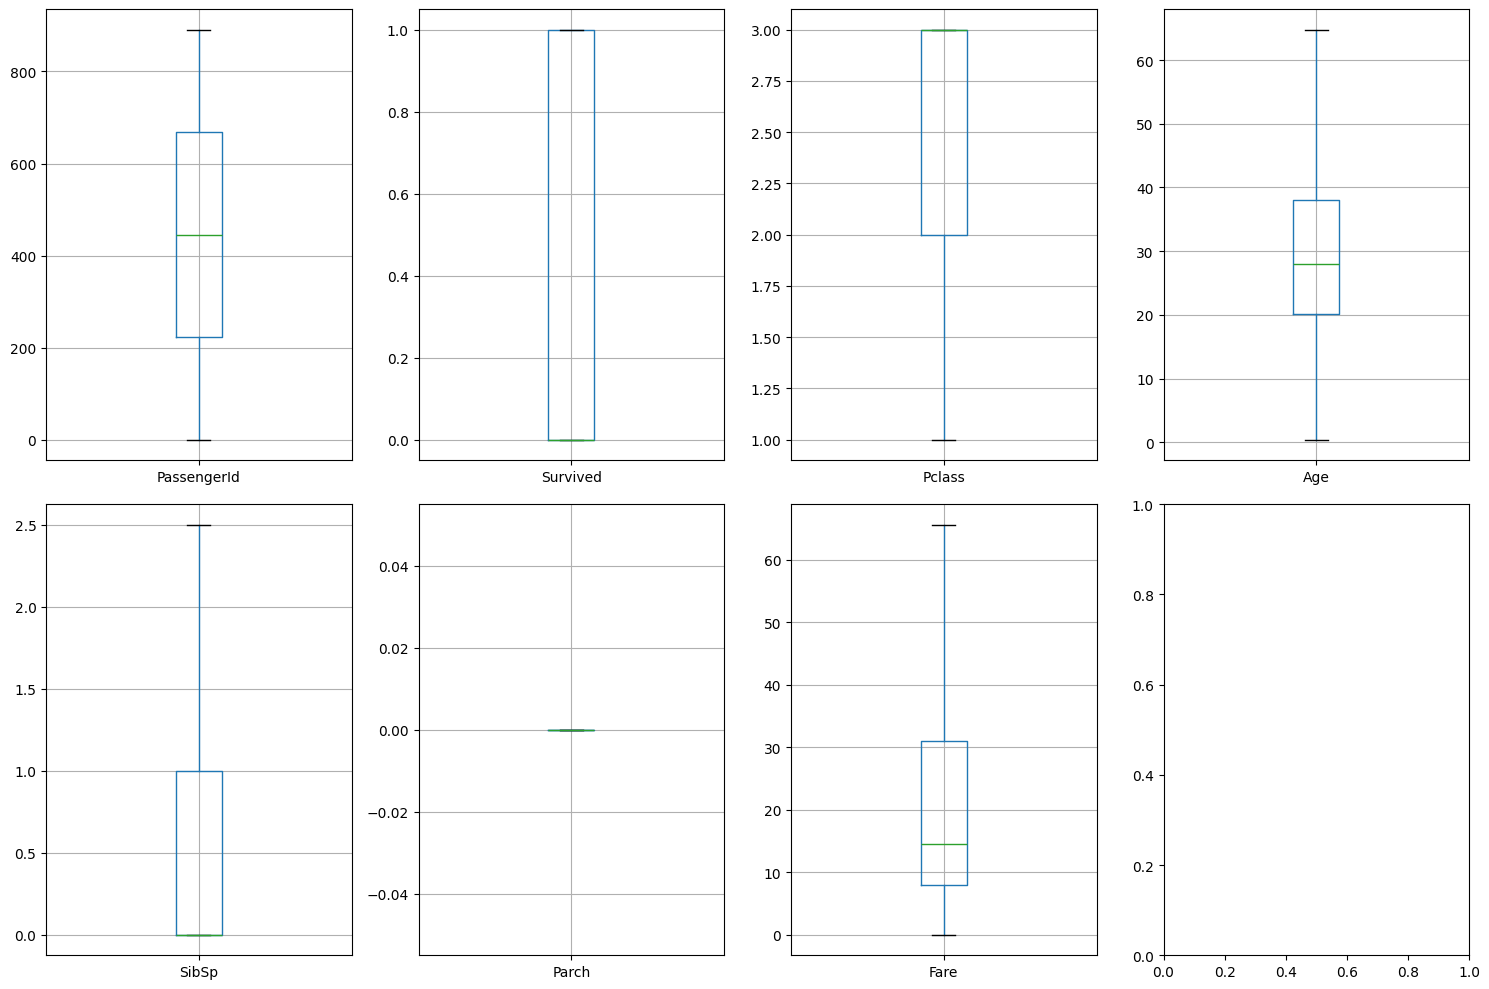

In [56]:
# Check if outliers are removed or not

cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(2, 4, figsize = (15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    df.boxplot(column = col, ax = axes[i])

plt.tight_layout()
plt.show()

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# Treat missing values

# Replacing null values in numerical columns with median
median_1 = df['Age'].median()
df['Age'] = df['Age'].replace(np.nan, median_1)

# Replacing null values in categorical columns with mode
mode_1 = df['Cabin'].mode()[0]
mode_2 = df['Embarked'].mode()[0]

df['Cabin'] = df['Cabin'].replace(np.nan, mode_1)
df['Embarked'] = df['Embarked'].replace(np.nan, mode_2)


In [59]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Univariate Analysis

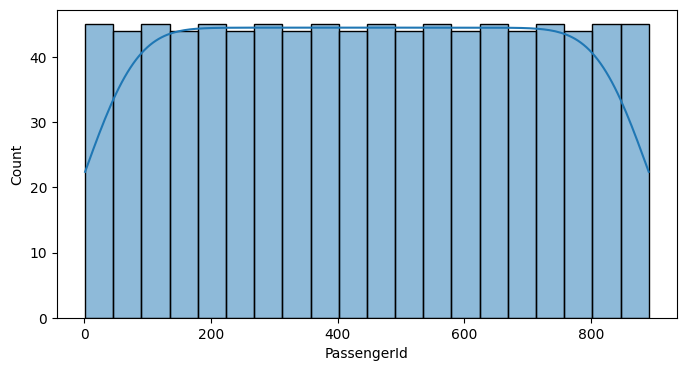

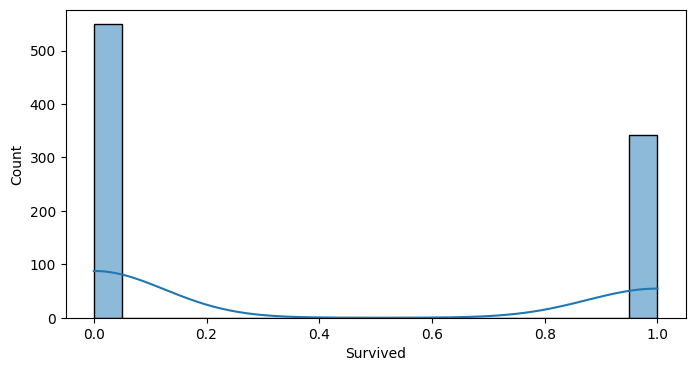

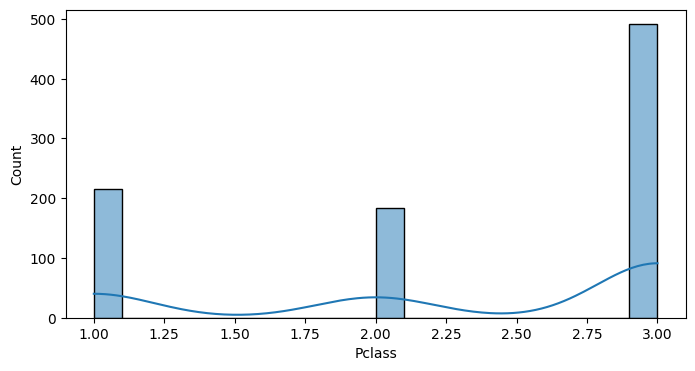

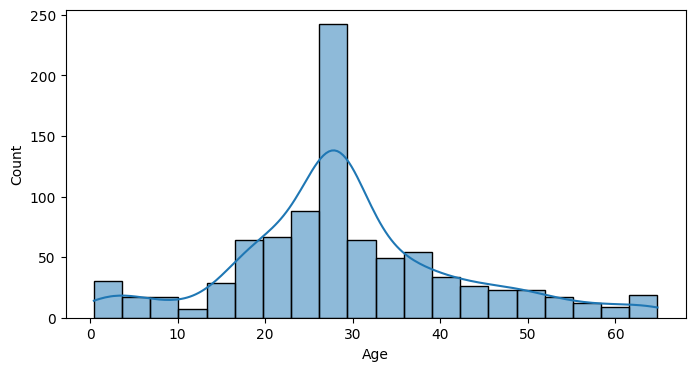

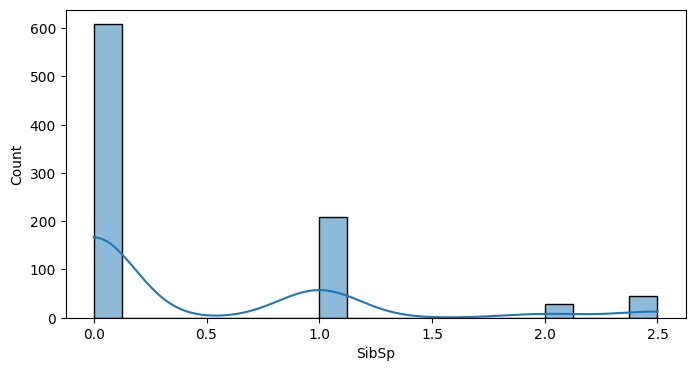

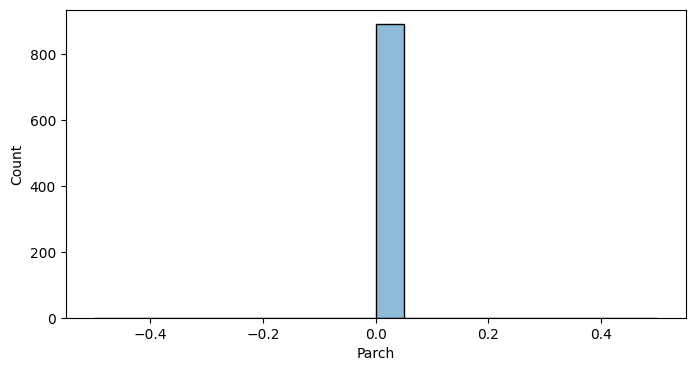

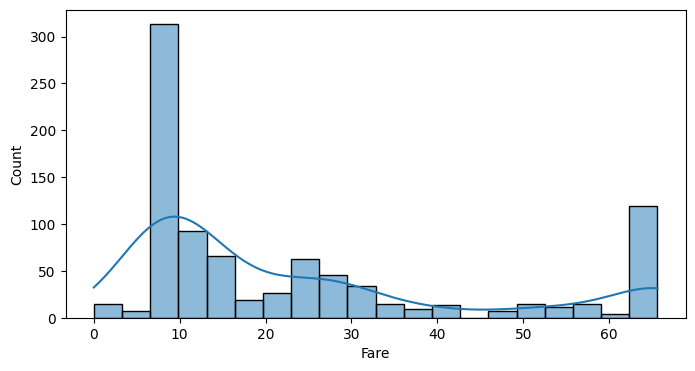

In [60]:
cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for col in cols:
    plt.figure(figsize = (8, 4))
    sns.histplot(df[col], kde = True, bins = 20)

### Bivariate Analysis

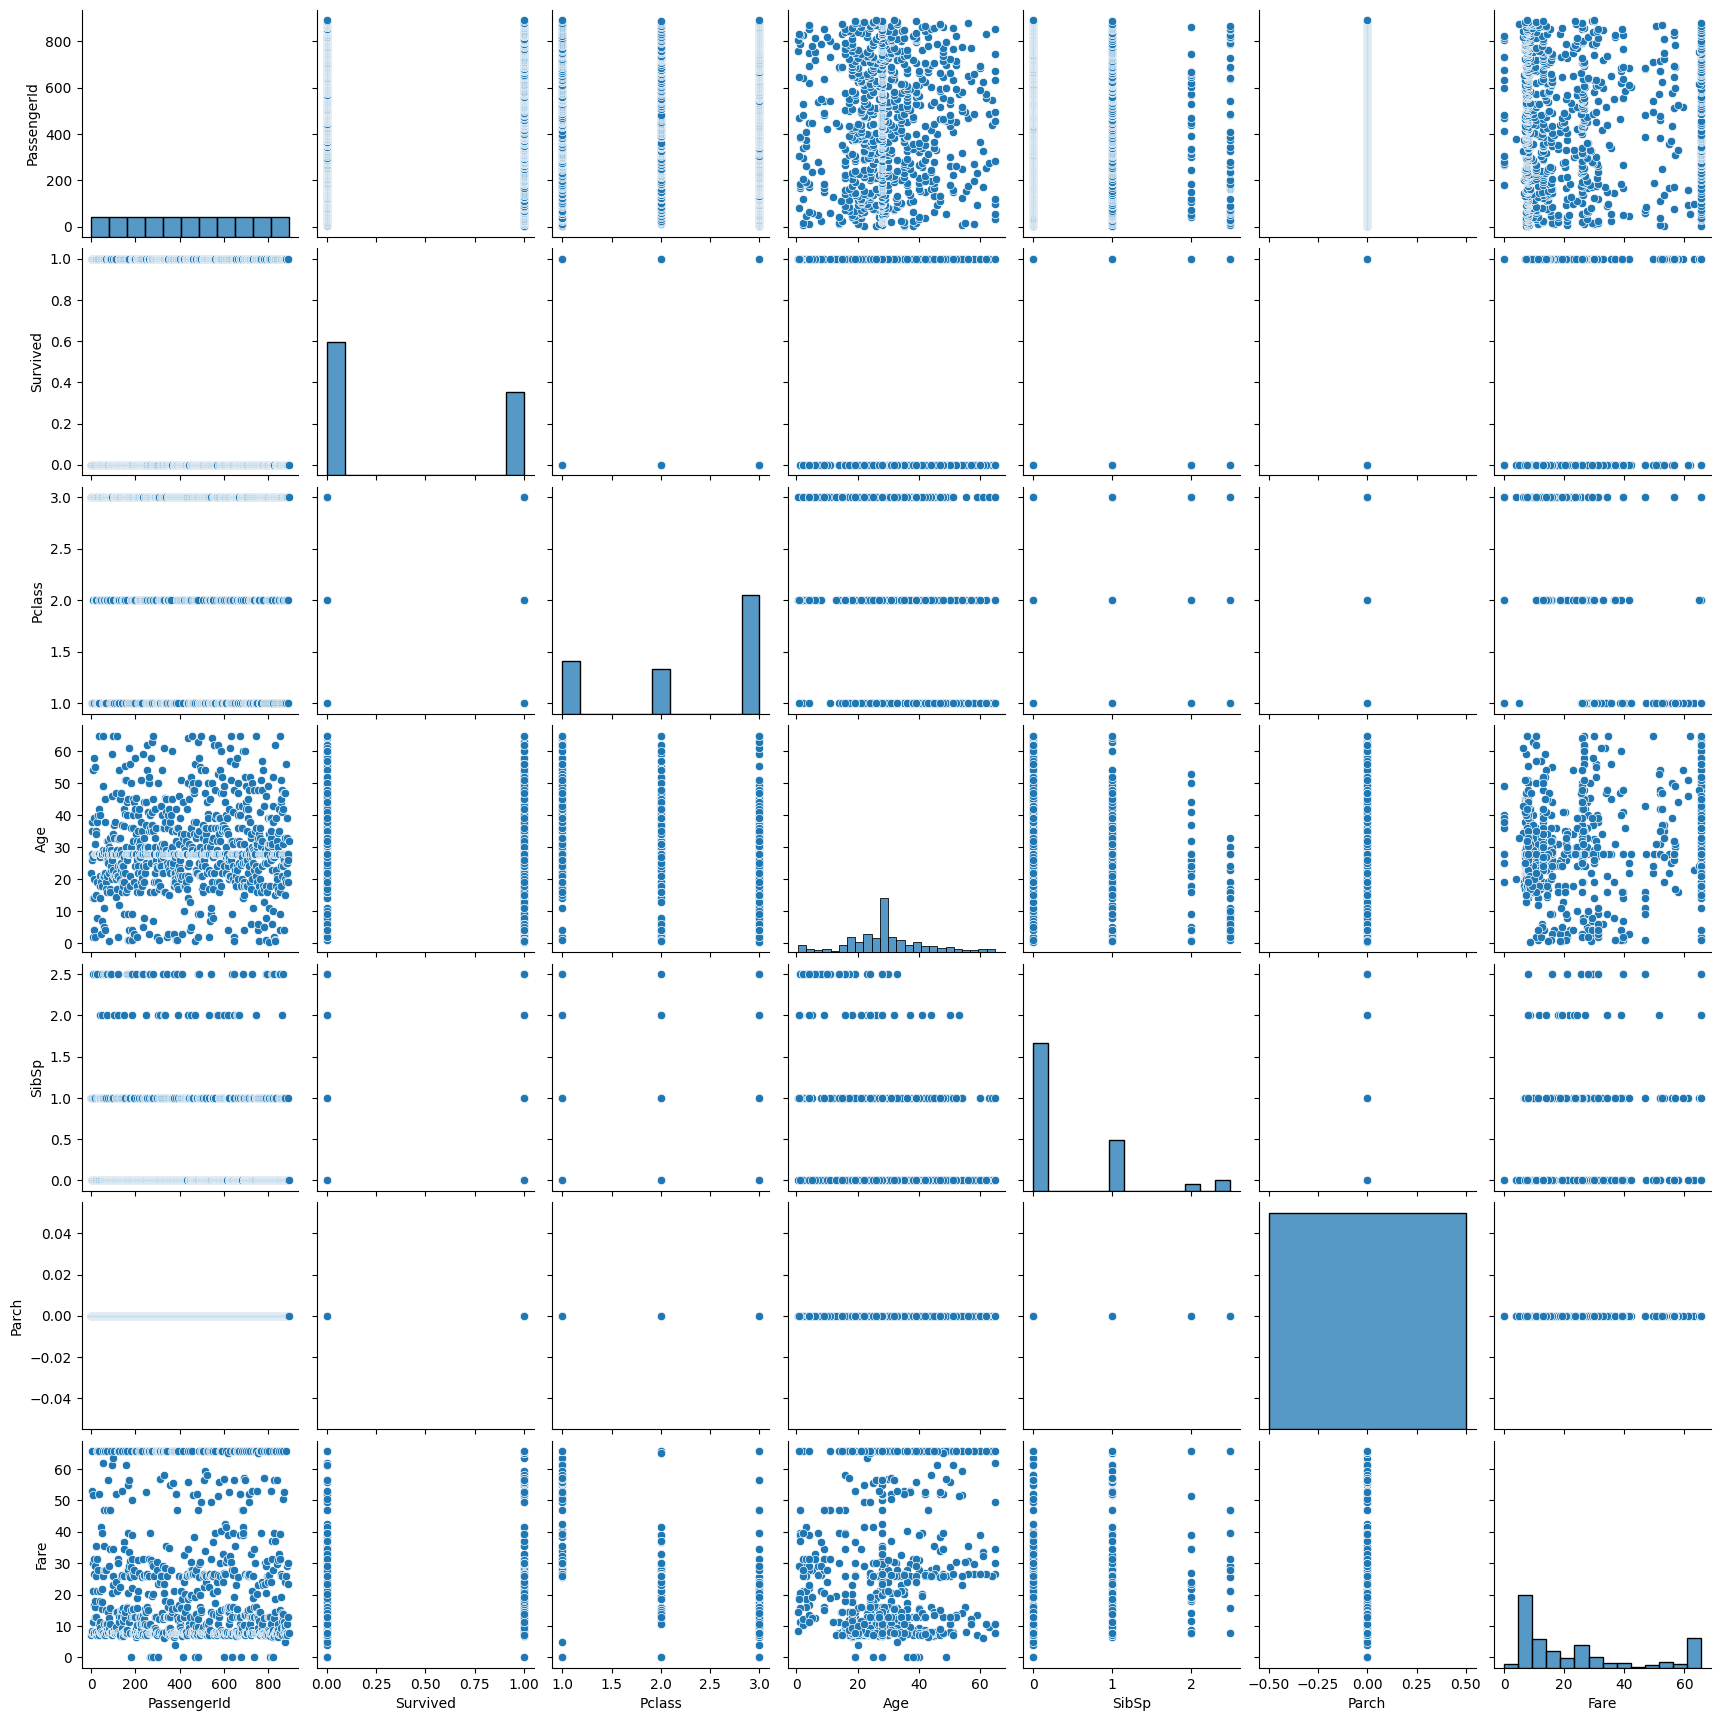

In [61]:
sns.pairplot(df)
plt.show()

### Multivariate Analysis

<Axes: >

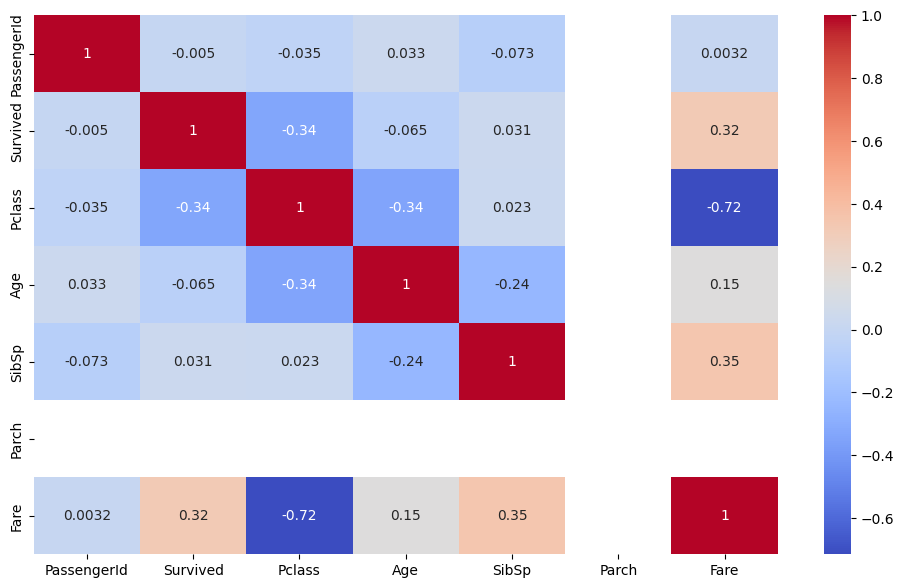

In [62]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.select_dtypes(include = ['number']).corr(), annot = True, cmap = 'coolwarm')

In [ ]:
# Converting categorical columns to numerical using one-hot encoding

categorical_cols = df.select_dtypes(include = 'object').columns
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True).astype(int)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38,1,0,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35,1,0,53,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Declare Feature variable and Target variable

In [65]:
X = df.drop('Survived', axis = 1)
Y = df['Survived']

### Split Data into training and testing

In [66]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [67]:
# Checking the shape of training and testing data

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 1725), (179, 1725), (712,), (179,))

### Ensemble Random Forest Classifier 

In [68]:

rfc = RandomForestClassifier(n_estimators = 10,random_state = 0)

rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

In [69]:
# Check accuracy score

print("Model accuracy score with 10 decision trees: {0:0.4f}".format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with 10 decision trees: 0.8045


In [70]:
# Initaite the model with 100 decision trees

rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)

rfc_100.fit(X_train, Y_train)

Y_pred_100 = rfc_100.predict(X_test)

In [71]:
# Check accuracy score
print("Model accuracy score with 100 decision trees: {0:0.4f}".format(accuracy_score(Y_test, Y_pred_100)))

Model accuracy score with 100 decision trees: 0.8268


In [72]:
# Initiate the model with 500 decision trees

rfc_500 = RandomForestClassifier(n_estimators = 500, random_state = 0)

rfc_500.fit(X_train, Y_train)

Y_pred_500 = rfc_500.predict(X_test)

In [73]:
# Check accuracy score
print("Model accuracy score with 500 decision trees: {0:0.4f}".format(accuracy_score(Y_test, Y_pred_500)))

Model accuracy score with 500 decision trees: 0.8324


### Important features with Random Forst Model

In [74]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

clf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
# View the feature scores
feature_scores = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

feature_scores

Sex_male                                0.146076
Fare                                    0.052222
Age                                     0.049046
PassengerId                             0.047611
Pclass                                  0.038468
                                          ...   
Ticket_17764                            0.000000
Name_Ball, Mrs. (Ada E Hall)            0.000000
Name_Barbara, Mrs. (Catherine David)    0.000000
Name_Barber, Miss. Ellen "Nellie"       0.000000
Cabin_E49                               0.000000
Length: 1725, dtype: float64

<Axes: >

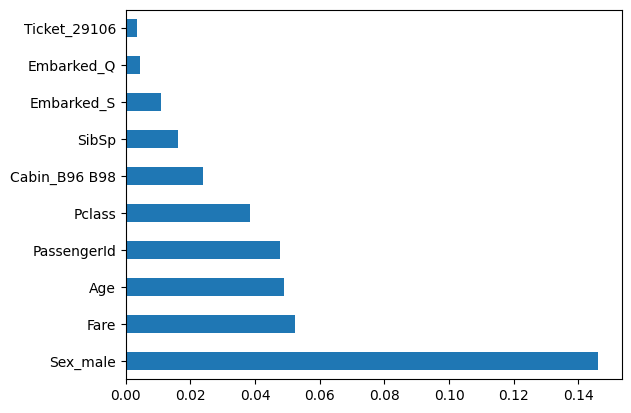

In [76]:
top_features = feature_scores[:10]
feature_scores = feature_scores.sort_values(ascending = False)
top_features.plot(kind = 'barh')

### Confusion Matrix

In [77]:
# Print the Confusion Matrix 

cm = confusion_matrix(Y_test, Y_pred_100)

print("Confusion Matrix\n\n", cm)

Confusion Matrix

 [[97  8]
 [23 51]]


### Classification Report

In [78]:

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [79]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, Y_train)
Y_proba = rf.predict_proba(X_test)[:, 1]

### ROC-AUC Curve

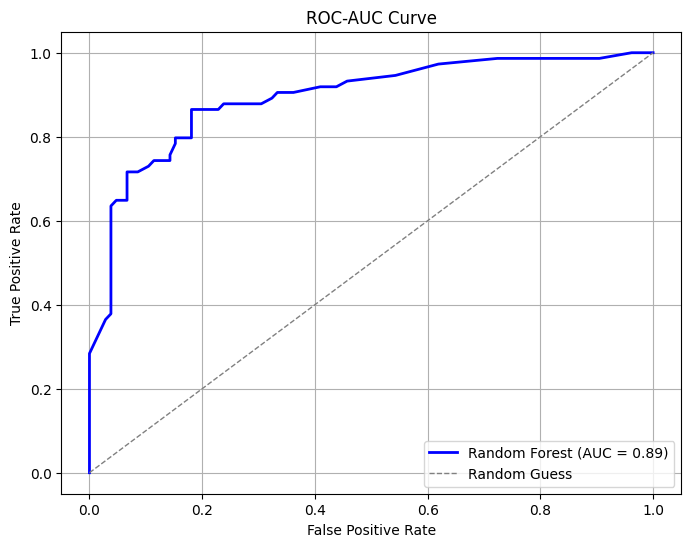

In [80]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC-AUC Curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

### GridSearchCV

In [84]:
param_grid = {
    'max_depth' : [5, 7, 10],                       # MAximum depth of the tree
    'max_features' : [4, 6],                        # Number of features to consider at each splitting
    'min_samples_leaf' : [5, 10],
    'min_samples_split' : [50, 100],
    'n_estimators' : [100, 200, 300]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)

grid_search.fit(X_train, Y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 7, ...], 'max_features': [4, 6], 'min_samples_leaf': [5, 10], 'min_samples_split': [50, 100], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [83]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,50
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
Ytrain_pred = best_grid.predict(X_train)
Ytest_pred = best_grid.predict(X_test)

confusion_matrix(Y_train, Ytrain_pred)

array([[444,   0],
       [268,   0]])

In [ ]:
print(classification_report(Y_train, Ytrain_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       444
           1       0.00      0.00      0.00       268

    accuracy                           0.62       712
   macro avg       0.31      0.50      0.38       712
weighted avg       0.39      0.62      0.48       712



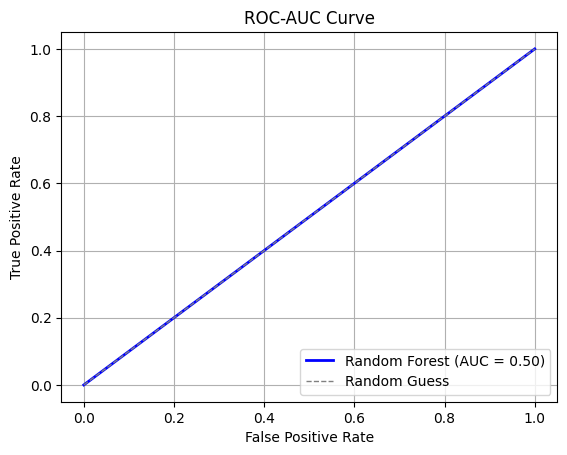

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_train, Ytrain_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--', lw = 1, label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()